In [1]:
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import seaborn as sns
import harmonypy as hm
import scrublet as scr
from matplotlib import rcParams
import umap

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=120, color_map='viridis')
sc.logging.print_versions()

-----
anndata     0.7.5
scanpy      1.7.0
sinfo       0.3.1
-----
PIL                 8.1.0
anndata             0.7.5
backcall            0.1.0
cffi                1.14.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
h5py                2.10.0
harmonypy           NA
igraph              0.7.1
importlib_metadata  1.5.0
ipykernel           5.1.4
ipython_genutils    0.2.0
jedi                0.16.0
joblib              1.0.1
kiwisolver          1.3.1
legacy_api_wrap     0.0.0
leidenalg           0.8.2
llvmlite            0.34.0
matplotlib          3.2.1
mkl                 2.3.0
mpl_toolkits        NA
natsort             7.1.1
numba               0.51.2
numexpr             2.7.2
numpy               1.19.2
packaging           20.9
pandas              1.1.5
parso               0.6.2
pexpect             4.8.

In [2]:
def DEG_table(adata):
    result = adata.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    markers = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'pvals_adj', 'logfoldchanges']})
    return markers

In [3]:
def filtered_DEGs(adata, q_value = 1E-5, fold_change = 1):
    markers = DEG_table(adata)
    groups = adata.uns['rank_genes_groups']['names'].dtype.names
    output = pd.DataFrame()
    for i in groups:
        temp = markers[(markers.loc[:,i+'_p'] <= q_value) & (markers.loc[:,i+'_l'] >= fold_change)].loc[:,(i+'_n'):(i+'_l')]
        temp.reset_index(inplace=True, drop=True)
        output = output.join(temp, how='outer')
    return output

In [4]:
def filtered_DEG_names(adata, q_value = 1E-5, fold_change = 1):
    markers = DEG_table(adata)
    groups = adata.uns['rank_genes_groups']['names'].dtype.names
    output = pd.DataFrame()
    for i in groups:
        temp = markers[(markers.loc[:,i+'_p'] <= q_value) & (markers.loc[:,i+'_l'] >= fold_change)].loc[:,(i+'_n')]
        temp.reset_index(inplace=True, drop=True)
        output = output.join(temp, how='outer')
    return output

In [5]:
def filtered_down_reg_DEGs(adata, q_value = 1E-5, fold_change = -1):
    markers = DEG_table(adata)
    groups = adata.uns['rank_genes_groups']['names'].dtype.names
    output = pd.DataFrame()
    for i in groups:
        temp = markers[(markers.loc[:,i+'_p'] <= q_value) & (markers.loc[:,i+'_l'] <= fold_change)].loc[:,(i+'_n'):(i+'_l')]
        temp.reset_index(inplace=True, drop=True)
        output = output.join(temp, how='outer')
    return output

In [6]:
def filtered_down_reg_DEG_names(adata, q_value = 1E-5, fold_change = -1):
    markers = DEG_table(adata)
    groups = adata.uns['rank_genes_groups']['names'].dtype.names
    output = pd.DataFrame()
    for i in groups:
        temp = markers[(markers.loc[:,i+'_p'] <= q_value) & (markers.loc[:,i+'_l'] <= fold_change)].loc[:,(i+'_n')]
        temp.reset_index(inplace=True, drop=True)
        output = output.join(temp, how='outer')
    return output

In [7]:
adata_orig = sc.read_h5ad('./CMs_zfish_ven_analysis.h5ad')

In [8]:
adata_orig.shape

(4009, 3555)

In [9]:
print(adata_orig.X.max())
print(adata_orig.raw.X.max())

10.0
239.0


In [10]:
adata_vcm1 = adata_orig[adata_orig.obs['cell_states'] == 'CM1'].copy()

In [11]:
adata_out = anndata.AnnData(X=adata_vcm1.raw.X, obs=adata_vcm1.obs, var=adata_vcm1.raw.var, obsm=adata_vcm1.obsm).copy()
adata_out.write('./CM1_zfish.h5ad')

In [12]:
print(adata_vcm1.X.max())
print(adata_vcm1.raw.X.max())

10.0
239.0


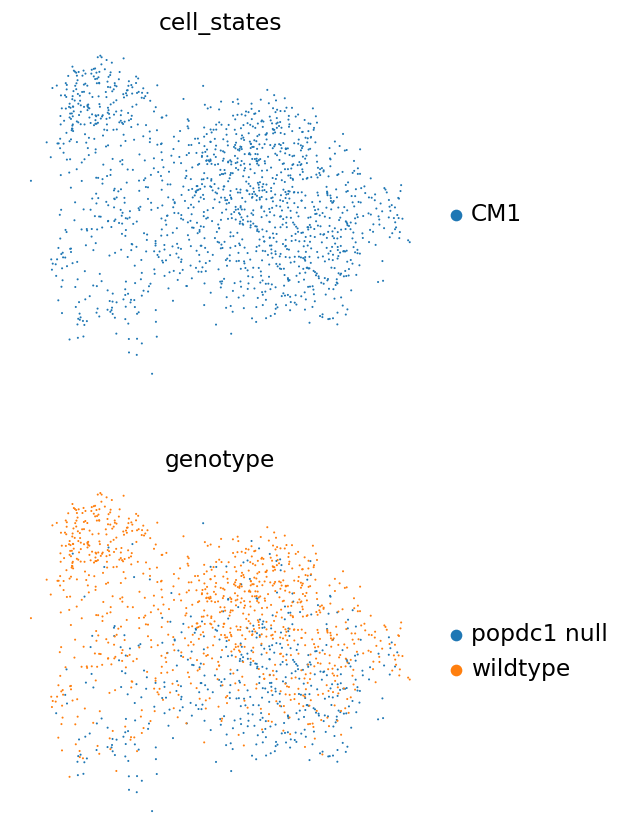

In [13]:
# You can plot any genes of interesting using UMAPs
# You can find different colour map names here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
sc.pl.umap(adata_vcm1, color = ['cell_states','genotype'
                              ], size = 6, legend_fontsize = 14, frameon = False, ncols=1, use_raw=True, color_map='coolwarm')

In [14]:
sc.tl.rank_genes_groups(adata_vcm1, 'genotype'
                        , method = 'wilcoxon', use_raw = True)

In [15]:
markers_nuclei = DEG_table(adata_vcm1)
markers_nuclei.head(10)

,popdc1 null_n,popdc1 null_p,popdc1 null_l,wildtype_n,wildtype_p,wildtype_l
0,acta1b,2.100223e-170,25.548569,fstl1b,2.226217e-122,6.422623
1,dntt,3.515708e-137,6.229529,mpped2,1.508048e-113,6.962160
2,BX323861.3,1.168437e-130,21.605444,acsl1b,5.052122e-82,4.567811
3,zbtb16a,5.216869e-114,21.675127,igsf21a,5.303586e-77,7.188708
4,zyx,5.301586e-111,7.970679,nhsl1a,1.206122e-67,4.318683
5,actb2,1.274270e-86,4.176417,palm1b,3.533555e-66,4.541743
6,slc25a55a,2.320136e-84,5.039844,chsy3,1.018811e-61,4.753597
7,tns1a,8.143140e-82,4.313168,slc25a3b,1.254659e-60,3.298117
8,ell,8.637442e-82,7.046707,mybpc3,1.514995e-56,19.793158
9,actc1a-1,7.992067e-78,8.120059,mcamb,1.578800e-56,3.670265


In [16]:
sc.tl.dendrogram(adata_vcm1, groupby='genotype')

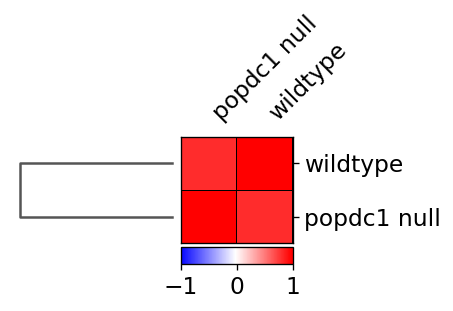

In [17]:
sc.pl.correlation_matrix(adata_vcm1, groupby='genotype')

In [19]:
filtered_markers_nuclei = filtered_DEGs(adata_vcm1, q_value = 1E-5, fold_change = 1)

In [20]:
filtered_markers_nuclei.head(20)

,popdc1 null_n,popdc1 null_p,popdc1 null_l,wildtype_n,wildtype_p,wildtype_l
0,acta1b,2.100223e-170,25.548569,fstl1b,2.226217e-122,6.422623
1,dntt,3.515708e-137,6.229529,mpped2,1.508048e-113,6.962160
2,BX323861.3,1.168437e-130,21.605444,acsl1b,5.052122e-82,4.567811
3,zbtb16a,5.216869e-114,21.675127,igsf21a,5.303586e-77,7.188708
4,zyx,5.301586e-111,7.970679,nhsl1a,1.206122e-67,4.318683
5,actb2,1.274270e-86,4.176417,palm1b,3.533555e-66,4.541743
6,slc25a55a,2.320136e-84,5.039844,chsy3,1.018811e-61,4.753597
7,tns1a,8.143140e-82,4.313168,slc25a3b,1.254659e-60,3.298117
8,ell,8.637442e-82,7.046707,mybpc3,1.514995e-56,19.793158
9,actc1a-1,7.992067e-78,8.120059,mcamb,1.578800e-56,3.670265


In [21]:
filtered_markers_names_nuclei = filtered_DEG_names(adata_vcm1, q_value = 1E-5, fold_change = 1)
filtered_markers_names_nuclei.head(20)

,popdc1 null_n,wildtype_n
0,acta1b,fstl1b
1,dntt,mpped2
2,BX323861.3,acsl1b
3,zbtb16a,igsf21a
4,zyx,nhsl1a
5,actb2,palm1b
6,slc25a55a,chsy3
7,tns1a,slc25a3b
8,ell,mybpc3
9,actc1a-1,mcamb


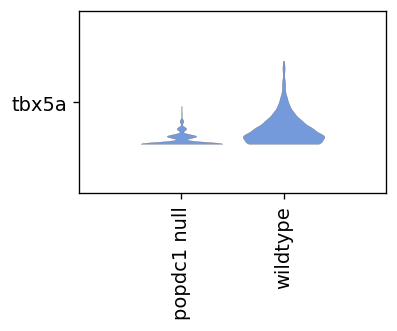

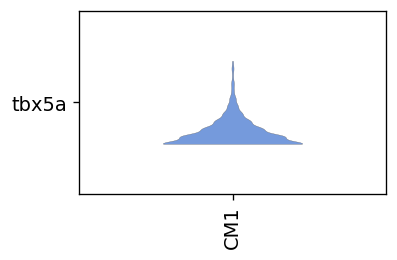

In [29]:
sc.pl.stacked_violin(adata_vcm1, var_names=['tbx5a'],groupby='genotype', swap_axes=True, figsize=[5,2], row_palette =('cornflowerblue'))
sc.pl.stacked_violin(adata_vcm1, var_names=['tbx5a'],groupby='cell_states', swap_axes=True, figsize=[5,2], row_palette =('cornflowerblue'))